In [1]:
import pandas as pd
import numpy as np
import glob
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
#For google colab
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
#Your path
%cd '/content/drive/MyDrive/DL/Project/'


Mounted at /content/drive
/content/drive/MyDrive/DL/Project


In [3]:
#view of a sample of data
df=pd.read_csv("data/A1Benchmark/real_1.csv")
df

,timestamp,value,is_anomaly
0,1,0.000000,0
1,2,0.091758,0
2,3,0.172297,0
3,4,0.226219,0
4,5,0.176358,0
...,...,...,...
1415,1416,0.159675,0
1416,1417,0.137626,0
1417,1418,0.197441,0
1418,1419,0.161966,0


In [4]:
#Convert 0 in value to NaN and drop
df['value'] = df['value'].replace(0, np.nan)
df = df.dropna(subset=['value'])
df.value = preprocessing.normalize([df.value]).T

<ipython-input-4-f679f6d9179a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.value = preprocessing.normalize([df.value]).T


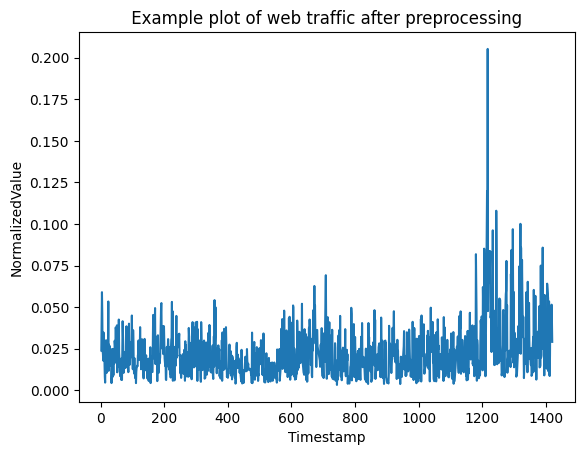

In [5]:
plt.plot(df.timestamp,df.value)
plt.xlabel("Timestamp")
plt.ylabel("NormalizedValue")
plt.title(" Example plot of web traffic after preprocessing ")
plt.show()

In [6]:
#function to convert dataframe to into 2d array
#creating sliding window of length 60 values in a sequence

def convert_2d(df):
    rows = []

    for i in range(len(df) - 59):
        segment = df.iloc[i:i+60]
        is_anomaly = segment['is_anomaly'].any()
        new_row = segment['value'].tolist() + [int(is_anomaly)]
        rows.append(new_row)
    data_frame = pd.DataFrame(rows)

    return data_frame

In [7]:
#test on sample
df2 = convert_2d(df)
df2

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.023933,0.044939,0.059003,0.045998,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,...,0.023166,0.014312,0.020640,0.042561,0.022618,0.019144,0.008544,0.014318,0.017870,0
1,0.044939,0.059003,0.045998,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,0.008102,...,0.014312,0.020640,0.042561,0.022618,0.019144,0.008544,0.014318,0.017870,0.013770,0
2,0.059003,0.045998,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,0.008102,0.004625,...,0.020640,0.042561,0.022618,0.019144,0.008544,0.014318,0.017870,0.013770,0.006221,0
3,0.045998,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,0.008102,0.004625,0.016524,...,0.042561,0.022618,0.019144,0.008544,0.014318,0.017870,0.013770,0.006221,0.019369,0
4,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,0.008102,0.004625,0.016524,0.022919,...,0.022618,0.019144,0.008544,0.014318,0.017870,0.013770,0.006221,0.019369,0.006319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,0.017441,0.015098,0.025371,0.008678,0.009982,0.022765,0.027482,0.032185,0.011102,0.060374,...,0.011454,0.013848,0.053461,0.009340,0.008602,0.021073,0.049554,0.045743,0.041647,0
1214,0.015098,0.025371,0.008678,0.009982,0.022765,0.027482,0.032185,0.011102,0.060374,0.023431,...,0.013848,0.053461,0.009340,0.008602,0.021073,0.049554,0.045743,0.041647,0.035896,0
1215,0.025371,0.008678,0.009982,0.022765,0.027482,0.032185,0.011102,0.060374,0.023431,0.019470,...,0.053461,0.009340,0.008602,0.021073,0.049554,0.045743,0.041647,0.035896,0.051497,0
1216,0.008678,0.009982,0.022765,0.027482,0.032185,0.011102,0.060374,0.023431,0.019470,0.025885,...,0.009340,0.008602,0.021073,0.049554,0.045743,0.041647,0.035896,0.051497,0.042245,0


In [8]:
#Import and concat all files
path = r'data/A1Benchmark' #set the path accordingly
all_files=glob.glob(path+"/*.csv")


In [9]:
preprocessed_dfs = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['value'] = df['value'].replace(0, np.nan)
    df = df.dropna(subset=['value'])

    # Normalize the 'value' column
    normalized_values = preprocessing.normalize([df['value'].to_numpy()])[0]
    df['value'] = normalized_values

    preprocessed_dfs.append(df)

concatenated_df = pd.concat(preprocessed_dfs, axis=0, ignore_index=True)

In [10]:
concatenated_df

,timestamp,value,is_anomaly
0,1,0.117274,0
1,2,0.065254,0
2,3,0.035630,0
3,4,0.069953,0
4,5,0.023508,0
...,...,...,...
92673,1435,0.057625,1
92674,1436,0.061902,1
92675,1437,0.061226,1
92676,1438,0.094766,1


In [11]:
frame = convert_2d(concatenated_df)

In [12]:
frame

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.117274,0.065254,0.035630,0.069953,0.023508,0.032052,0.025228,0.030400,0.028542,0.025995,...,0.066689,0.038383,0.092724,0.104266,0.055304,0.116074,0.032219,0.109890,0.075174,0
1,0.065254,0.035630,0.069953,0.023508,0.032052,0.025228,0.030400,0.028542,0.025995,0.027283,...,0.038383,0.092724,0.104266,0.055304,0.116074,0.032219,0.109890,0.075174,0.032297,0
2,0.035630,0.069953,0.023508,0.032052,0.025228,0.030400,0.028542,0.025995,0.027283,0.029525,...,0.092724,0.104266,0.055304,0.116074,0.032219,0.109890,0.075174,0.032297,0.032976,0
3,0.069953,0.023508,0.032052,0.025228,0.030400,0.028542,0.025995,0.027283,0.029525,0.022249,...,0.104266,0.055304,0.116074,0.032219,0.109890,0.075174,0.032297,0.032976,0.048264,0
4,0.023508,0.032052,0.025228,0.030400,0.028542,0.025995,0.027283,0.029525,0.022249,0.026978,...,0.055304,0.116074,0.032219,0.109890,0.075174,0.032297,0.032976,0.048264,0.020991,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92614,0.023860,0.021384,0.021384,0.032189,0.024761,0.020259,0.025436,0.018683,0.020034,0.019808,...,0.022735,0.018908,0.016207,0.023410,0.020484,0.036015,0.061676,0.057850,0.057625,1
92615,0.021384,0.021384,0.032189,0.024761,0.020259,0.025436,0.018683,0.020034,0.019808,0.023860,...,0.018908,0.016207,0.023410,0.020484,0.036015,0.061676,0.057850,0.057625,0.061902,1
92616,0.021384,0.032189,0.024761,0.020259,0.025436,0.018683,0.020034,0.019808,0.023860,0.026336,...,0.016207,0.023410,0.020484,0.036015,0.061676,0.057850,0.057625,0.061902,0.061226,1
92617,0.032189,0.024761,0.020259,0.025436,0.018683,0.020034,0.019808,0.023860,0.026336,0.024761,...,0.023410,0.020484,0.036015,0.061676,0.057850,0.057625,0.061902,0.061226,0.094766,1


In [13]:
frame.to_csv('final_dataset.csv', index=False)

In [14]:
frame=pd.read_csv("final_dataset.csv")
frame

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.117274,0.065254,0.035630,0.069953,0.023508,0.032052,0.025228,0.030400,0.028542,0.025995,...,0.066689,0.038383,0.092724,0.104266,0.055304,0.116074,0.032219,0.109890,0.075174,0
1,0.065254,0.035630,0.069953,0.023508,0.032052,0.025228,0.030400,0.028542,0.025995,0.027283,...,0.038383,0.092724,0.104266,0.055304,0.116074,0.032219,0.109890,0.075174,0.032297,0
2,0.035630,0.069953,0.023508,0.032052,0.025228,0.030400,0.028542,0.025995,0.027283,0.029525,...,0.092724,0.104266,0.055304,0.116074,0.032219,0.109890,0.075174,0.032297,0.032976,0
3,0.069953,0.023508,0.032052,0.025228,0.030400,0.028542,0.025995,0.027283,0.029525,0.022249,...,0.104266,0.055304,0.116074,0.032219,0.109890,0.075174,0.032297,0.032976,0.048264,0
4,0.023508,0.032052,0.025228,0.030400,0.028542,0.025995,0.027283,0.029525,0.022249,0.026978,...,0.055304,0.116074,0.032219,0.109890,0.075174,0.032297,0.032976,0.048264,0.020991,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92614,0.023860,0.021384,0.021384,0.032189,0.024761,0.020259,0.025436,0.018683,0.020034,0.019808,...,0.022735,0.018908,0.016207,0.023410,0.020484,0.036015,0.061676,0.057850,0.057625,1
92615,0.021384,0.021384,0.032189,0.024761,0.020259,0.025436,0.018683,0.020034,0.019808,0.023860,...,0.018908,0.016207,0.023410,0.020484,0.036015,0.061676,0.057850,0.057625,0.061902,1
92616,0.021384,0.032189,0.024761,0.020259,0.025436,0.018683,0.020034,0.019808,0.023860,0.026336,...,0.016207,0.023410,0.020484,0.036015,0.061676,0.057850,0.057625,0.061902,0.061226,1
92617,0.032189,0.024761,0.020259,0.025436,0.018683,0.020034,0.019808,0.023860,0.026336,0.024761,...,0.023410,0.020484,0.036015,0.061676,0.057850,0.057625,0.061902,0.061226,0.094766,1


In [15]:
from keras.models import Sequential
from keras.layers import Dense,Reshape,Conv2D,Flatten,MaxPooling1D,Conv1D,LSTM
from keras import optimizers
from keras.utils import to_categorical

In [16]:
#Keras model for comparison
model_k=Sequential()
model_k.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='tanh',input_shape=(60, 1)))
model_k.add(MaxPooling1D(pool_size=2, strides=2))
model_k.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='tanh'))
model_k.add(MaxPooling1D(pool_size=2, strides=2))
model_k.add(Reshape((1,15*64)))
model_k.add(LSTM(64, activation='tanh',return_sequences='False'))
model_k.add(Flatten())
model_k.add(Dense(32, activation='tanh'))
model_k.add(Dense(2, activation='softmax'))
model_k.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model_k.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 60, 64)            384       
                                                                 
 max_pooling1d (MaxPooling1  (None, 30, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 30, 64)            20544     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 15, 64)            0         
 g1D)                                                            
                                                                 
 reshape (Reshape)           (None, 1, 960)            0         
                                                                 
 lstm (LSTM)                 (None, 1, 64)             2

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [18]:
class CLSTM(nn.Module):
    def __init__(self):
        super(CLSTM, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, kernel_size=5, stride=1, padding = 'same')
        self.pool = nn.MaxPool1d(2, stride=2)
        self.conv2 = nn.Conv1d(64, 64, kernel_size=5, stride=1, padding = 'same')
        self.lstm = nn.LSTM(input_size=960, hidden_size=64, batch_first=True)
        self.fc1 = nn.Linear(64, 32)
        self.fc2 = nn.Linear(32, 2)
        self.tanh = nn.Tanh()
        self.flatten = nn.Flatten()


    def forward(self, x):
        x = self.conv1(x)
        x = self.tanh(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = self.tanh(x)
        x = self.pool(x)

        # Reshape for LSTM layer
        #x = x.permute(0, 2, 1)
        #x = x.reshape(x.size(0), 1, -1)
        x = x.view(x.size(0), 1, -1)
        x, _ = self.lstm(x)

        # Flatten the output for Dense layer
        #x = self.flatten(x)
        x = x.contiguous().view(x.size(0), -1)

        # Dense layers
        x = self.tanh(self.fc1(x))
        x = torch.softmax(self.fc2(x), dim=1)
        return x

In [19]:
y = frame.iloc[:, 60]
X = frame.iloc[:, 0:60]

# Train-test split
train_size = int(0.7 * len(X))
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [20]:
#reshaping the data
X_train = X_train.to_numpy().reshape(-1, 60, 1)
X_test = X_test.to_numpy().reshape(-1, 60, 1)
y_test = y_test.to_numpy()

In [21]:
#converting y_train to categorical
y_train = to_categorical(y_train)

In [22]:
#train the Keras model
history=model_k.fit(x=X_train, y=y_train, batch_size=512, epochs=100, verbose=2)

Epoch 1/100
127/127 - 7s - loss: 0.3654 - accuracy: 0.8886 - 7s/epoch - 59ms/step
Epoch 2/100
127/127 - 1s - loss: 0.3254 - accuracy: 0.8941 - 704ms/epoch - 6ms/step
Epoch 3/100
127/127 - 1s - loss: 0.3161 - accuracy: 0.8973 - 689ms/epoch - 5ms/step
Epoch 4/100
127/127 - 1s - loss: 0.2934 - accuracy: 0.9074 - 662ms/epoch - 5ms/step
Epoch 5/100
127/127 - 1s - loss: 0.2801 - accuracy: 0.9106 - 651ms/epoch - 5ms/step
Epoch 6/100
127/127 - 1s - loss: 0.2784 - accuracy: 0.9099 - 768ms/epoch - 6ms/step
Epoch 7/100
127/127 - 1s - loss: 0.2746 - accuracy: 0.9110 - 672ms/epoch - 5ms/step
Epoch 8/100
127/127 - 1s - loss: 0.2698 - accuracy: 0.9132 - 676ms/epoch - 5ms/step
Epoch 9/100
127/127 - 1s - loss: 0.2676 - accuracy: 0.9143 - 830ms/epoch - 7ms/step
Epoch 10/100
127/127 - 1s - loss: 0.2634 - accuracy: 0.9161 - 1s/epoch - 8ms/step
Epoch 11/100
127/127 - 1s - loss: 0.2586 - accuracy: 0.9181 - 921ms/epoch - 7ms/step
Epoch 12/100
127/127 - 1s - loss: 0.2566 - accuracy: 0.9187 - 961ms/epoch - 8ms

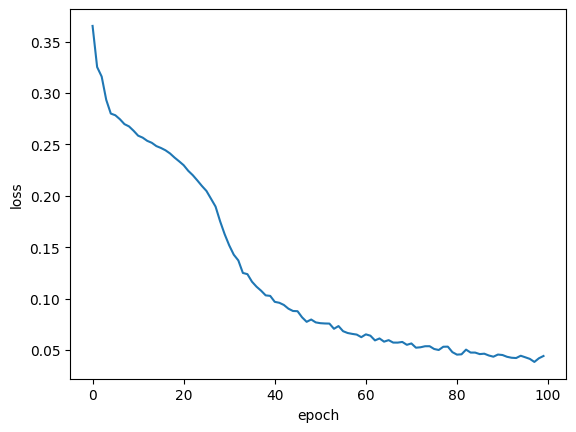

In [23]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [24]:
#convert to tensors
X_train_tensor = torch.Tensor(X_train).permute(0, 2, 1)
X_test_tensor = torch.Tensor(X_test).permute(0, 2, 1)
y_train_tensor = torch.Tensor(y_train)
y_test_tensor = torch.LongTensor(y_test)


# Create DataLoader
batch_size=512
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [25]:
model = CLSTM()

In [26]:
learning_rate = 0.001

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [27]:
def model_summary(model):
    print("Model Summary:")
    total_params = 0

    for name, parameter in model.named_parameters():
        param = parameter.numel()
        total_params += param
        if parameter.requires_grad:
            print(f"Layer: {name} | Size: {param} | Requires Grad: {parameter.requires_grad}")

    print(f"Total Parameters: {total_params}")

model_summary(model)

Model Summary:
Layer: conv1.weight | Size: 320 | Requires Grad: True
Layer: conv1.bias | Size: 64 | Requires Grad: True
Layer: conv2.weight | Size: 20480 | Requires Grad: True
Layer: conv2.bias | Size: 64 | Requires Grad: True
Layer: lstm.weight_ih_l0 | Size: 245760 | Requires Grad: True
Layer: lstm.weight_hh_l0 | Size: 16384 | Requires Grad: True
Layer: lstm.bias_ih_l0 | Size: 256 | Requires Grad: True
Layer: lstm.bias_hh_l0 | Size: 256 | Requires Grad: True
Layer: fc1.weight | Size: 2048 | Requires Grad: True
Layer: fc1.bias | Size: 32 | Requires Grad: True
Layer: fc2.weight | Size: 64 | Requires Grad: True
Layer: fc2.bias | Size: 2 | Requires Grad: True
Total Parameters: 285730


In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CLSTM(
  (conv1): Conv1d(1, 64, kernel_size=(5,), stride=(1,), padding=same)
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=same)
  (lstm): LSTM(960, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
  (tanh): Tanh()
  (flatten): Flatten(start_dim=1, end_dim=-1)
)

In [29]:
#Train Pytorch model
epochs = 100
max_grad_norm = 1.0

train_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm) #gradient clipping

        optimizer.step()
        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    print(f'Epoch {epoch+1}, Training Loss: {avg_train_loss}')

Epoch 1, Training Loss: 0.3486059040535153
Epoch 2, Training Loss: 0.3389069109451114
Epoch 3, Training Loss: 0.33376767433534454
Epoch 4, Training Loss: 0.319296674113574
Epoch 5, Training Loss: 0.29621429964313356
Epoch 6, Training Loss: 0.28101876436725376
Epoch 7, Training Loss: 0.27506414654217365
Epoch 8, Training Loss: 0.2707887968913777
Epoch 9, Training Loss: 0.26689819123331954
Epoch 10, Training Loss: 0.2645559734481526
Epoch 11, Training Loss: 0.2632233263470056
Epoch 12, Training Loss: 0.2591833843020942
Epoch 13, Training Loss: 0.2561333754400569
Epoch 14, Training Loss: 0.25252756781465424
Epoch 15, Training Loss: 0.25107499804553085
Epoch 16, Training Loss: 0.24988958004891404
Epoch 17, Training Loss: 0.2437953886788661
Epoch 18, Training Loss: 0.24040617553267893
Epoch 19, Training Loss: 0.23773041942457515
Epoch 20, Training Loss: 0.23663794489826742
Epoch 21, Training Loss: 0.23145318653170519
Epoch 22, Training Loss: 0.23043079850241893
Epoch 23, Training Loss: 0.22

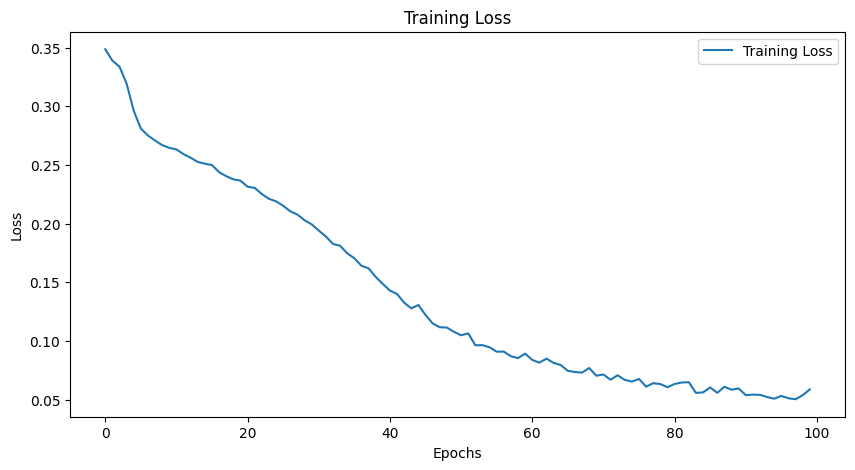

In [30]:
# Plotting the training loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [31]:
model.eval()

true_labels = []
predicted_labels = []
test_loss = 0.0
total_samples = 0

with torch.no_grad():
    for inputs, targets in test_loader:
      inputs = inputs.to(device)
      outputs = model(inputs)
      _, predicted = torch.max(outputs, 1)
      true_labels.extend(targets.cpu().numpy())
      predicted_labels.extend(predicted.cpu().numpy())
      test_loss += loss.item() * inputs.size(0)
      total_samples += inputs.size(0)


accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

average_test_loss = test_loss / total_samples

print(f'Test Loss: {average_test_loss:.4f}')


print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Test Loss: 0.0388
Accuracy: 0.9178
Precision: 0.6646
Recall: 0.6221
F1-score: 0.6427


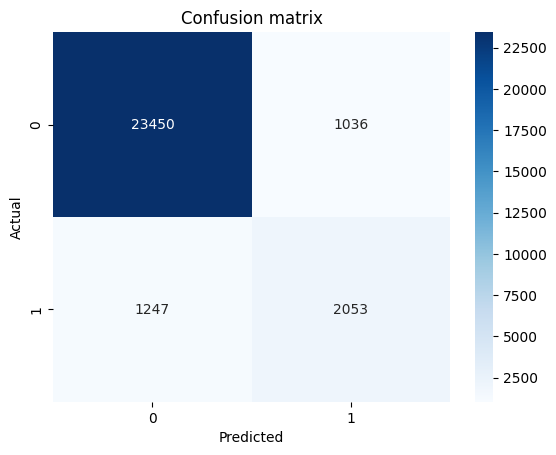

In [32]:
cm = confusion_matrix(true_labels, predicted_labels)

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()